In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/data/image

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
#!7za -y x "/content/drive/MyDrive/My Projects/Expression Classification from Facial Images/data/image/origin.7z*"

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#!cp -r ./origin "/content/drive/MyDrive/My Projects/Expression Classification from Facial Images"

In [6]:
label_path = r"/kaggle/input/expression-in-the-wild-expw-dataset/label.lst"

images_path=r"/kaggle/input/origin-expw/origin"

In [7]:
import pandas as pd



face_data = pd.read_csv(label_path, sep=" " , header= None)

face_data

,0,1,2,3,4,5,6,7
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [8]:
face_data.columns =['image_name', 'face_id_in_image', 'face_box_top', 'face_box_left' , 'face_box_right' , 'face_box_bottom' , 'face_box_cofidence' , 'expression_label']

face_data

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [9]:
face_data.shape

(91793, 8)

In [10]:
face_cofidence = face_data[face_data.face_box_cofidence > 55]

In [11]:
face_cofidence.shape

(39599, 8)

In [12]:
from numpy.core.fromnumeric import resize

import cv2

import matplotlib.pyplot as plt

import os





stored_image = []

stored_label = []



for i, row in face_cofidence.sample(20000).iterrows():

    image_name = row["image_name"]

    left = row["face_box_left"]

    right = row["face_box_right"]

    top = row["face_box_top"]

    bottom = row["face_box_bottom"]

    label = row["expression_label"]

    img_path = os.path.join(images_path, image_name)

    read_image = cv2.imread(img_path)



    if read_image is not None:

         crop_image = read_image[top:bottom , left:right]

    else:

        continue



    if crop_image  is not None:

     crop_resize = cv2.resize(crop_image  , ( 64,64))



    else:

      continue



    stored_image.append(crop_resize)

    stored_label.append(label)




In [13]:


import numpy as np



X = np.array(stored_image)

Y = np.array(stored_label)

In [14]:
x = X / 255.0

In [15]:
X_shaped = x.reshape((-1,64*64*3))

X_shaped.shape

(20000, 12288)

In [16]:
import pandas as pd

pd.Series(Y).value_counts()

3    7692
6    6381
4    1977
5    1831
0     936
1     935
2     248
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE



smote = SMOTE()

X_smote,Y_smote = smote.fit_resample(X_shaped, Y)

In [18]:
pd.Series(Y_smote).value_counts()

3    7692
6    7692
2    7692
0    7692
4    7692
5    7692
1    7692
Name: count, dtype: int64

In [19]:
x = X_smote.reshape(-1,64,64,3)

In [20]:
Y = Y_smote

In [21]:
len(x)


53844

In [22]:
len(X)

20000

In [23]:
import numpy as np



from keras.utils import to_categorical

y = to_categorical(Y)

In [24]:
import numpy as np

from sklearn.model_selection import train_test_split



X_train, X_temp, Y_train, Y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)


In [25]:
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator





img_datagen = ImageDataGenerator(



    rotation_range=20,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    fill_mode='nearest'

)





img_datagen.fit(X_train)

## ***MODEL***

In [26]:
import numpy as np

import tensorflow as tf

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

num_classes = 7

model.add(Dense(num_classes, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



history = model.fit(img_datagen.flow(X_train, Y_train, batch_size=32), epochs=50, validation_data=(X_val, Y_val))

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729234437.226819     101 service.cc:145] XLA service 0x7dd150005620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729234437.226880     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   5/1347 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.0604 - loss: 2.0933    

I0000 00:00:1729234439.670403     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1347/1347 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.1885 - loss: 1.9113 - val_accuracy: 0.2716 - val_loss: 1.8000
Epoch 2/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.2537 - loss: 1.8203 - val_accuracy: 0.3111 - val_loss: 1.7018
Epoch 3/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.2946 - loss: 1.7537 - val_accuracy: 0.3602 - val_loss: 1.6163
Epoch 4/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.3301 - loss: 1.6885 - val_accuracy: 0.3756 - val_loss: 1.6224
Epoch 5/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.3571 - loss: 1.6363 - val_accuracy: 0.4369 - val_loss: 1.4756
Epoch 6/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 64s 48ms/step - accuracy: 0.3812 - loss: 1.5804 - val_accuracy: 0.4474 - val_loss: 1.4457
Epoch 7/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - accuracy: 0.3966 - loss: 1.5513 - val_accuracy: 0.4454 - val_loss: 1.4495
Epoch 8/50
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 64s 48ms/step - accuracy: 0.4092 - loss: 1.52

In [35]:
loss ,accuracy =model.evaluate(X_test,Y_test )

print(f"Test Loss: {loss:.4f}")

print(f"Test Accuracy: {accuracy:.4f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5923 - loss: 1.0740
Test Loss: 1.0776
Test Accuracy: 0.5840


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


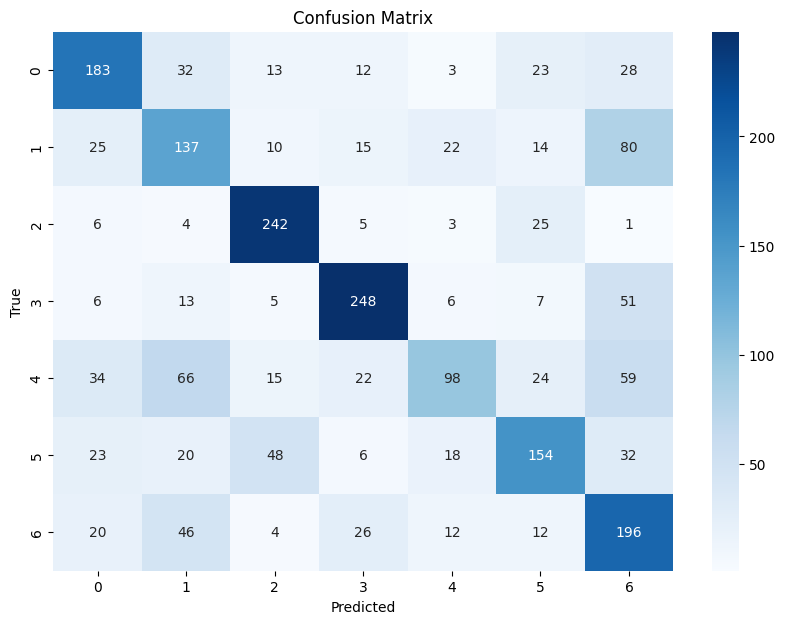

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       294
           1       0.43      0.45      0.44       303
           2       0.72      0.85      0.78       286
           3       0.74      0.74      0.74       336
           4       0.60      0.31      0.41       318
           5       0.59      0.51      0.55       301
           6       0.44      0.62      0.51       316

    accuracy                           0.58      2154
   macro avg       0.59      0.59      0.58      2154
weighted avg       0.59      0.58      0.58      2154



In [38]:
# F1 Score (macro and weighted)
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")

F1 Score (Weighted): 0.5777


In [39]:
# Training and validation accuracy and loss
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

Train Accuracy: 0.5465
Train Loss: 1.1999
Validation Accuracy: 0.6072
Validation Loss: 1.0616


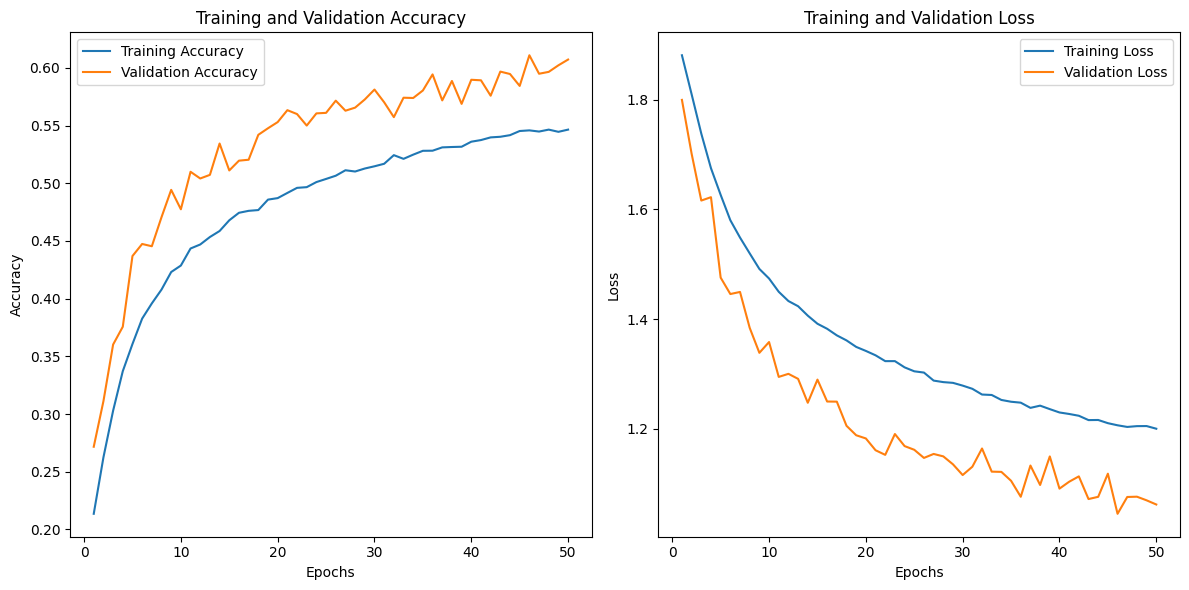

In [40]:
import matplotlib.pyplot as plt

# Retrieve metrics from the history object
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


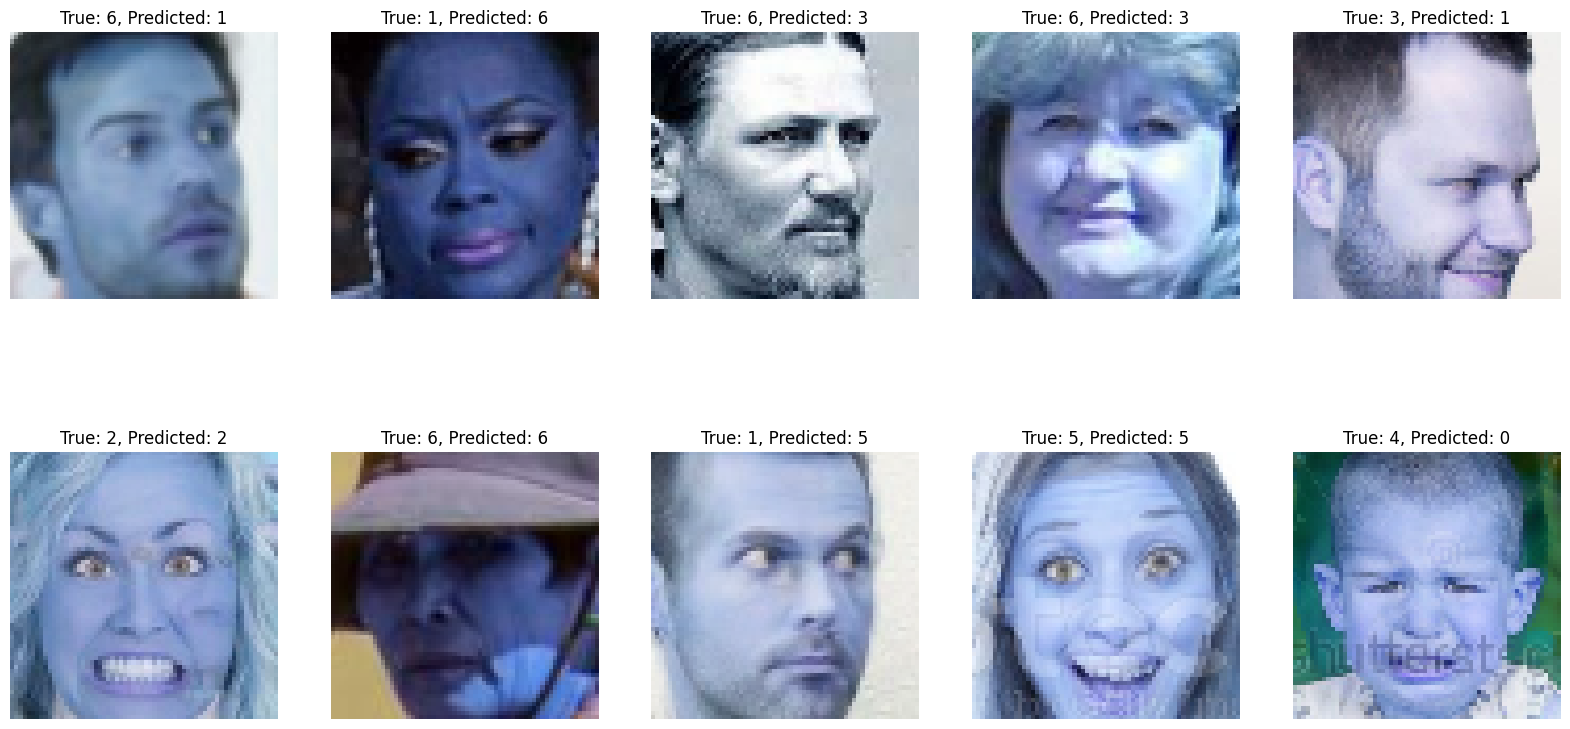

In [42]:
def show_top_predictions(images, true_labels, predicted_labels, top_n=10):
    plt.figure(figsize=(20, 10))
    for i in range(top_n):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Show top 10 predictions
show_top_predictions(X_test[:10], Y_true[:10], Y_pred_classes[:10])
